In [110]:
# https://towardsdatascience.com/infectious-disease-modelling-part-i-understanding-sir-28d60e29fdfc

from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
# !pip install mpld3
# import mpld3
mpld3.enable_notebook()

In [104]:
def deriv(y, t, N, beta, gamma):
    S, I, _R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

In [109]:
N = 1000
beta = 1.0  # infected person infects 1 other person per day
D = 4.0 # infections (and spreading) lasts four days
gamma = 1.0 / D

S0, I0, R0 = 999, 1, 0  # initial conditions: one infected, rest susceptible
y0 = S0, I0, R0 # Initial conditions vector

(999, 1, 0)


In [106]:
t = np.linspace(0, 49, 50) # Grid of time points (in days)

# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

<class 'numpy.ndarray'>


In [107]:
def plotsir(t, S, I, R):
  f, ax = plt.subplots(1,1,figsize=(10,4))
  ax.plot(t, S, 'b', alpha=0.7, linewidth=2, label='Susceptible')
  ax.plot(t, I, 'y', alpha=0.7, linewidth=2, label='Infected')
  ax.plot(t, R, 'g', alpha=0.7, linewidth=2, label='Recovered')

  ax.set_xlabel('Time (days)')

  ax.yaxis.set_tick_params(length=0)
  ax.xaxis.set_tick_params(length=0)
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')
  legend = ax.legend()
  legend.get_frame().set_alpha(0.5)
  for spine in ('top', 'right', 'bottom', 'left'):
      ax.spines[spine].set_visible(False)
  plt.show()

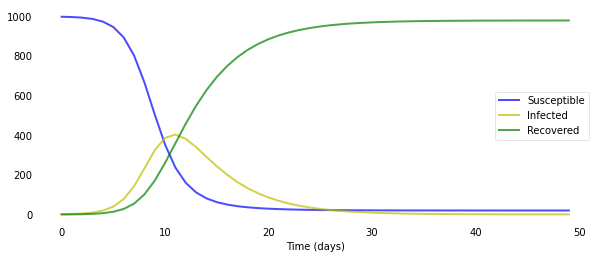

In [108]:
plotsir(t, S, I, R)